In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
from sklearn.model_selection import train_test_split
import pydot
import graphviz
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data,train_labels),(test_data, test_labels)=fashion_mnist.load_data()

In [5]:
print(f"Traning sample:\n {train_data[0]}\n")
print(f"Traning label:\n {train_labels[0]}\n")

Traning sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

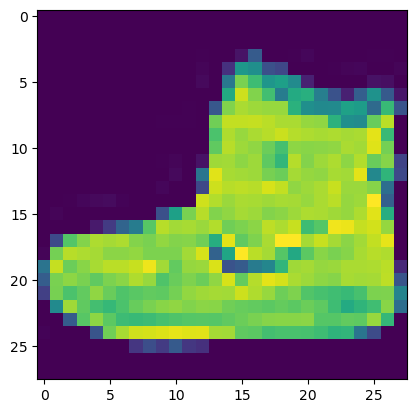

In [8]:
plt.imshow(train_data[0])
plt.show();

In [9]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

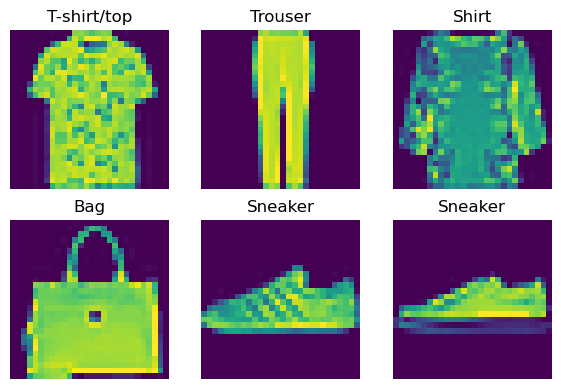

In [14]:
import random
plt.figure(figsize=(7,7))

for i in range(6):
    ax=plt.subplot(3,3,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index])
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
plt.show()



Input shape= 28 * 28
output shape= 10 (the number of labes that we have)
loss function = categoricalCrossentropy its not good for integer labels, it works for one hot encoded type of labels 
so we use,
loss function=sparsecategoricalcrossentropy

In [29]:
tf.random.set_seed(42)
# tf.keras.layers.Input(input_shape=[28,28]
model_1=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),    
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(10,activation="softmax")])

model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_1=model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8183 - accuracy: 0.1348 - val_loss: 1.7726 - val_accuracy: 0.2123
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7287 - accuracy: 0.2354 - val_loss: 1.6476 - val_accuracy: 0.2819
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6347 - accuracy: 0.2841 - val_loss: 1.6043 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6097 - accuracy: 0.2865 - val_loss: 1.5973 - val_accuracy: 0.2994
Epoch 5/10
1875/1875 [==============================] - 2s 979us/step - loss: 1.5953 - accuracy: 0.2999 - val_loss: 1.5802 - val_accuracy: 0.3115
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5793 - accuracy: 0.3032 - val_loss: 1.5642 - val_accuracy: 0.2975
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5591 - accuracy: 0.3227 - val_loss: 1.5880 - val_accurac

In [21]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [22]:
train_data.min(),train_data.max()

(0, 255)

In [23]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [25]:
tf.random.set_seed(42)
# tf.keras.layers.Input(input_shape=[28,28]
model_2=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),    
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(10,activation="softmax")])

model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_2=model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

So nerual network tends to perdorm better when we normlize the data.

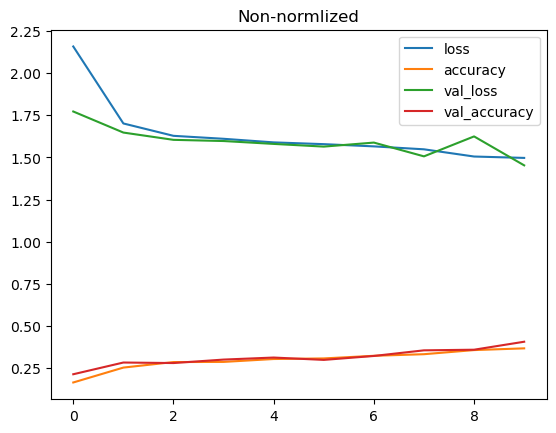

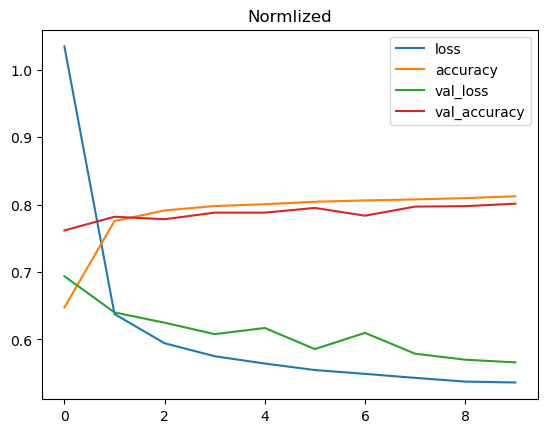

In [30]:
pd.DataFrame(history_1.history).plot(title="Non-normlized")
pd.DataFrame(history_2.history).plot(title="Normlized")
plt.show()


In [31]:
tf.random.set_seed(42)
# tf.keras.layers.Input(input_shape=[28,28]
model_3=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),    
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(10,activation="softmax")])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3* 10**(epoch/20))

model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_3=model_3.fit(train_data_norm,train_labels,epochs=40,callbacks=[lr_scheduler],validation_data=(test_data_norm,test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

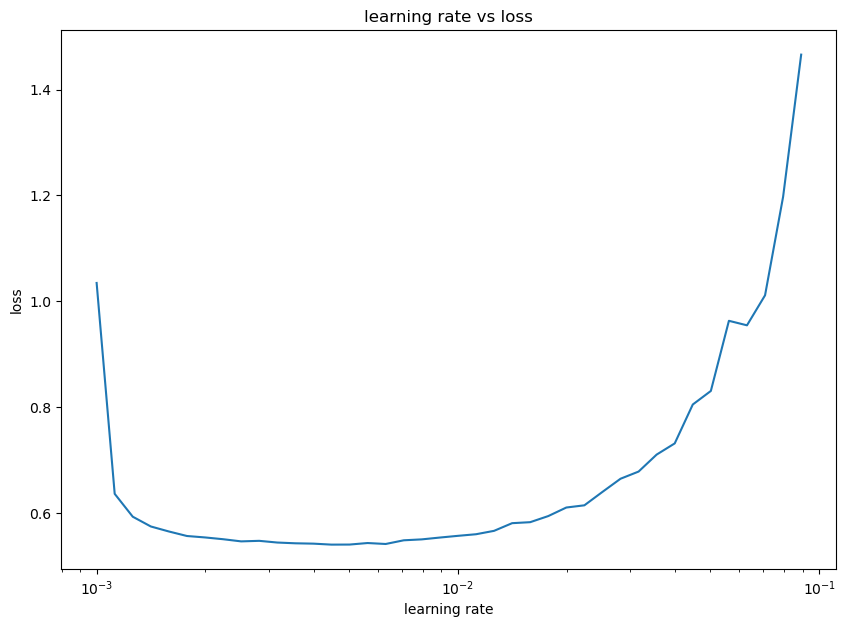

In [32]:
lrs=1e-3*10**(tf.range(40)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_3.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")
plt.show()

In [33]:
tf.random.set_seed(42)
# tf.keras.layers.Input(input_shape=[28,28]
model_4=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),    
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(10,activation="softmax")])

model_4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])
history_4=model_4.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels),verbose=2)

Epoch 1/20
1875/1875 - 2s - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 - 2s - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 - 2s - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 - 2s - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 - 2s - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 - 2s - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 - 2s - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epoch 8/20
1875/1875 - 2s - loss: 0.5428 - accuracy: 0.8077 - val_loss: 0.5787 - val_accuracy: 0.7971
Epoch 9/20
1875/1875 - 2s - loss: 0.5373 - accuracy: 0.8097 - val_loss: 0.5698 - val_accuracy: 0.7977
Epoch 10/20
1875/1875 - 2s - loss: 0.5360 - accuracy: 0.8124 - val_loss: 0.5658 - 

In [37]:
# Make predictions with the most recent model
y_probs = model_4.predict(test_data_norm) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.5630329e-11, 3.5361506e-13, 2.6633814e-05, 4.6356217e-08,
        5.0949970e-05, 9.6119225e-02, 8.1778374e-08, 9.1868617e-02,
        4.0605054e-03, 8.0787390e-01],
       [3.4278587e-06, 1.2899118e-16, 9.5989150e-01, 2.0516276e-07,
        1.5329180e-02, 2.4532760e-13, 2.4142820e-02, 1.1383188e-28,
        6.3272315e-04, 4.4789044e-08],
       [6.1062885e-05, 9.9657673e-01, 4.3866720e-08, 3.3405770e-03,
        1.3249410e-05, 1.4383270e-21, 8.2790211e-06, 7.3236338e-18,
        5.4811185e-08, 4.9225140e-14],
       [7.5031436e-05, 9.9053687e-01, 4.2528367e-07, 9.2231557e-03,
        1.3623090e-04, 1.8276229e-18, 2.6808217e-05, 4.8123638e-14,
        1.4521452e-06, 2.2211333e-11],
       [7.2189935e-02, 1.5495702e-06, 2.5566918e-01, 1.0363106e-02,
        4.3541353e-02, 1.1069488e-13, 6.1692995e-01, 6.7542062e-23,
        1.3049189e-03, 1.2140332e-09]], dtype=float32)

In [40]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [38]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

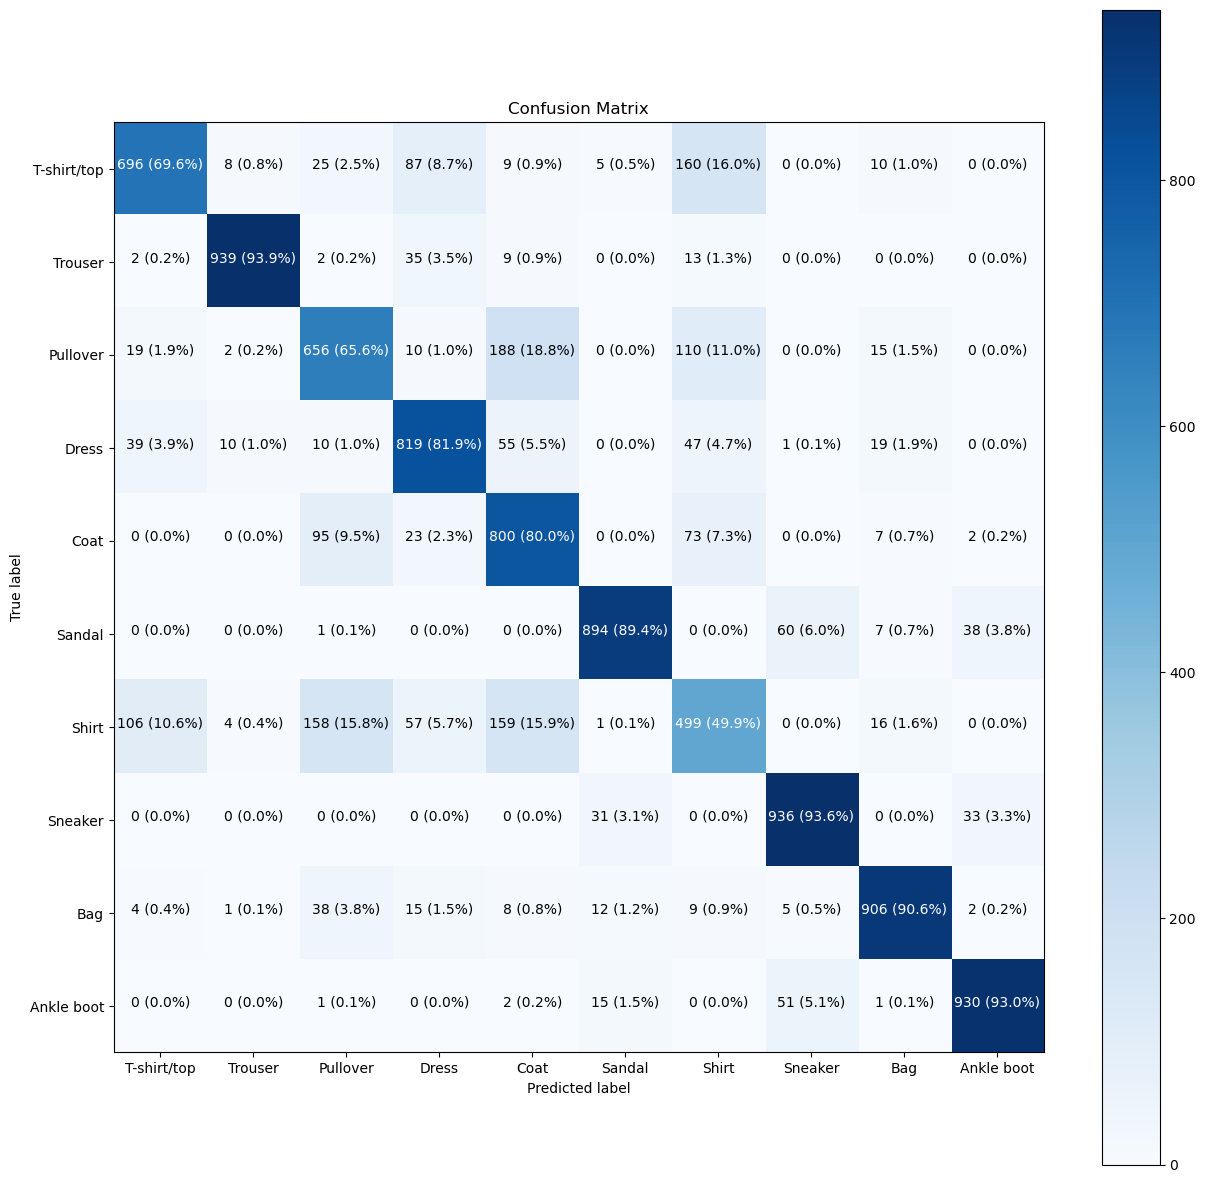

In [44]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

plt.show();

In [45]:
#how our model learn, or how our model predict based on the layers 
model_4.layers[1]

In [47]:
weights,biases=model_4.layers[1].get_weights()

weights,weights.shape

(array([[ 0.71502644, -0.06077074, -0.9976309 , -1.0484313 ],
        [ 0.27732113, -0.47155342, -0.529165  ,  0.02329238],
        [ 0.77524304,  0.5402761 , -1.1288571 , -0.7426154 ],
        ...,
        [-0.39453435,  0.47628692, -0.22641549,  0.25505954],
        [-0.40515777,  0.61810166,  0.23928408, -0.5038757 ],
        [ 0.23884557,  0.11606854, -0.12131306,  0.0435243 ]],
       dtype=float32),
 (784, 4))

In [48]:
biases,biases.shape

(array([ 2.4485515e-02, -6.1513978e-04, -2.7230203e-01,  8.1124836e-01],
       dtype=float32),
 (4,))